## Result Analysis

This notebook is used to analyze data resulting from the optimization process.  

__IMPORTANT__: in this notebook we consider results from the EA $\{100, 3\}$ (population size of 100 individuals and tournament selection of 3)

In [1]:
from notebook_utils import *

In [2]:
# MACRO
ev_results_all, initial_pop_all, ev_times_all, \
pop_stats_all, ev_arch_all, ev_oom_all = {}, {}, {}, {}, {}, {}
rl_results_all, rl_times_all, rl_best_acc_all, rl_oom_all = {}, {}, {}, {}
rs_results_all, rs_times_all, rs_best_acc_all, rs_oom_all = {}, {}, {}, {}
# MICRO
ev_results_all_micro, initial_pop_all_micro, ev_times_all_micro, \
pop_stats_all_micro, ev_arch_all_micro, ev_oom_all_micro = {}, {}, {}, {}, {}, {}
rl_results_all_micro, rl_times_all_micro, rl_best_acc_all_micro, rl_oom_all_micro = {}, {}, {}, {}
rs_results_all_micro, rs_times_all_micro, rs_best_acc_all_micro, rs_oom_all_micro = {}, {}, {}, {}
ev_type = 'ev1003'
# Import all datasets
datasets = [
    'citeseer',
    'cora',
    'pubmed',
    'cs',
    'computers',
    'photo',
    'physics'
]
for ds in datasets:
    # Unpack MACRO
    ev_results_all[ds], initial_pop_all[ds], ev_times_all[ds], \
    pop_stats_all[ds], ev_arch_all[ds], ev_oom_all[ds], \
    rl_results_all[ds], rl_times_all[ds], rl_best_acc_all[ds], rl_oom_all[ds], \
    rs_results_all[ds], rs_times_all[ds], rs_best_acc_all[ds], rs_oom_all[ds] = load_all_results(ds, macro=True, ev_type=ev_type)
    # Unpack MICRO
    ev_results_all_micro[ds], initial_pop_all_micro[ds], ev_times_all_micro[ds], \
    pop_stats_all_micro[ds], ev_arch_all_micro[ds], ev_oom_all_micro[ds], \
    rl_results_all_micro[ds], rl_times_all_micro[ds], rl_best_acc_all_micro[ds], rl_oom_all_micro[ds], \
    rs_results_all_micro[ds], rs_times_all_micro[ds], rs_best_acc_all_micro[ds], rs_oom_all_micro[ds] = load_all_results(ds, macro=False, ev_type=ev_type)

## Performance of evaluated architecture, by iteration

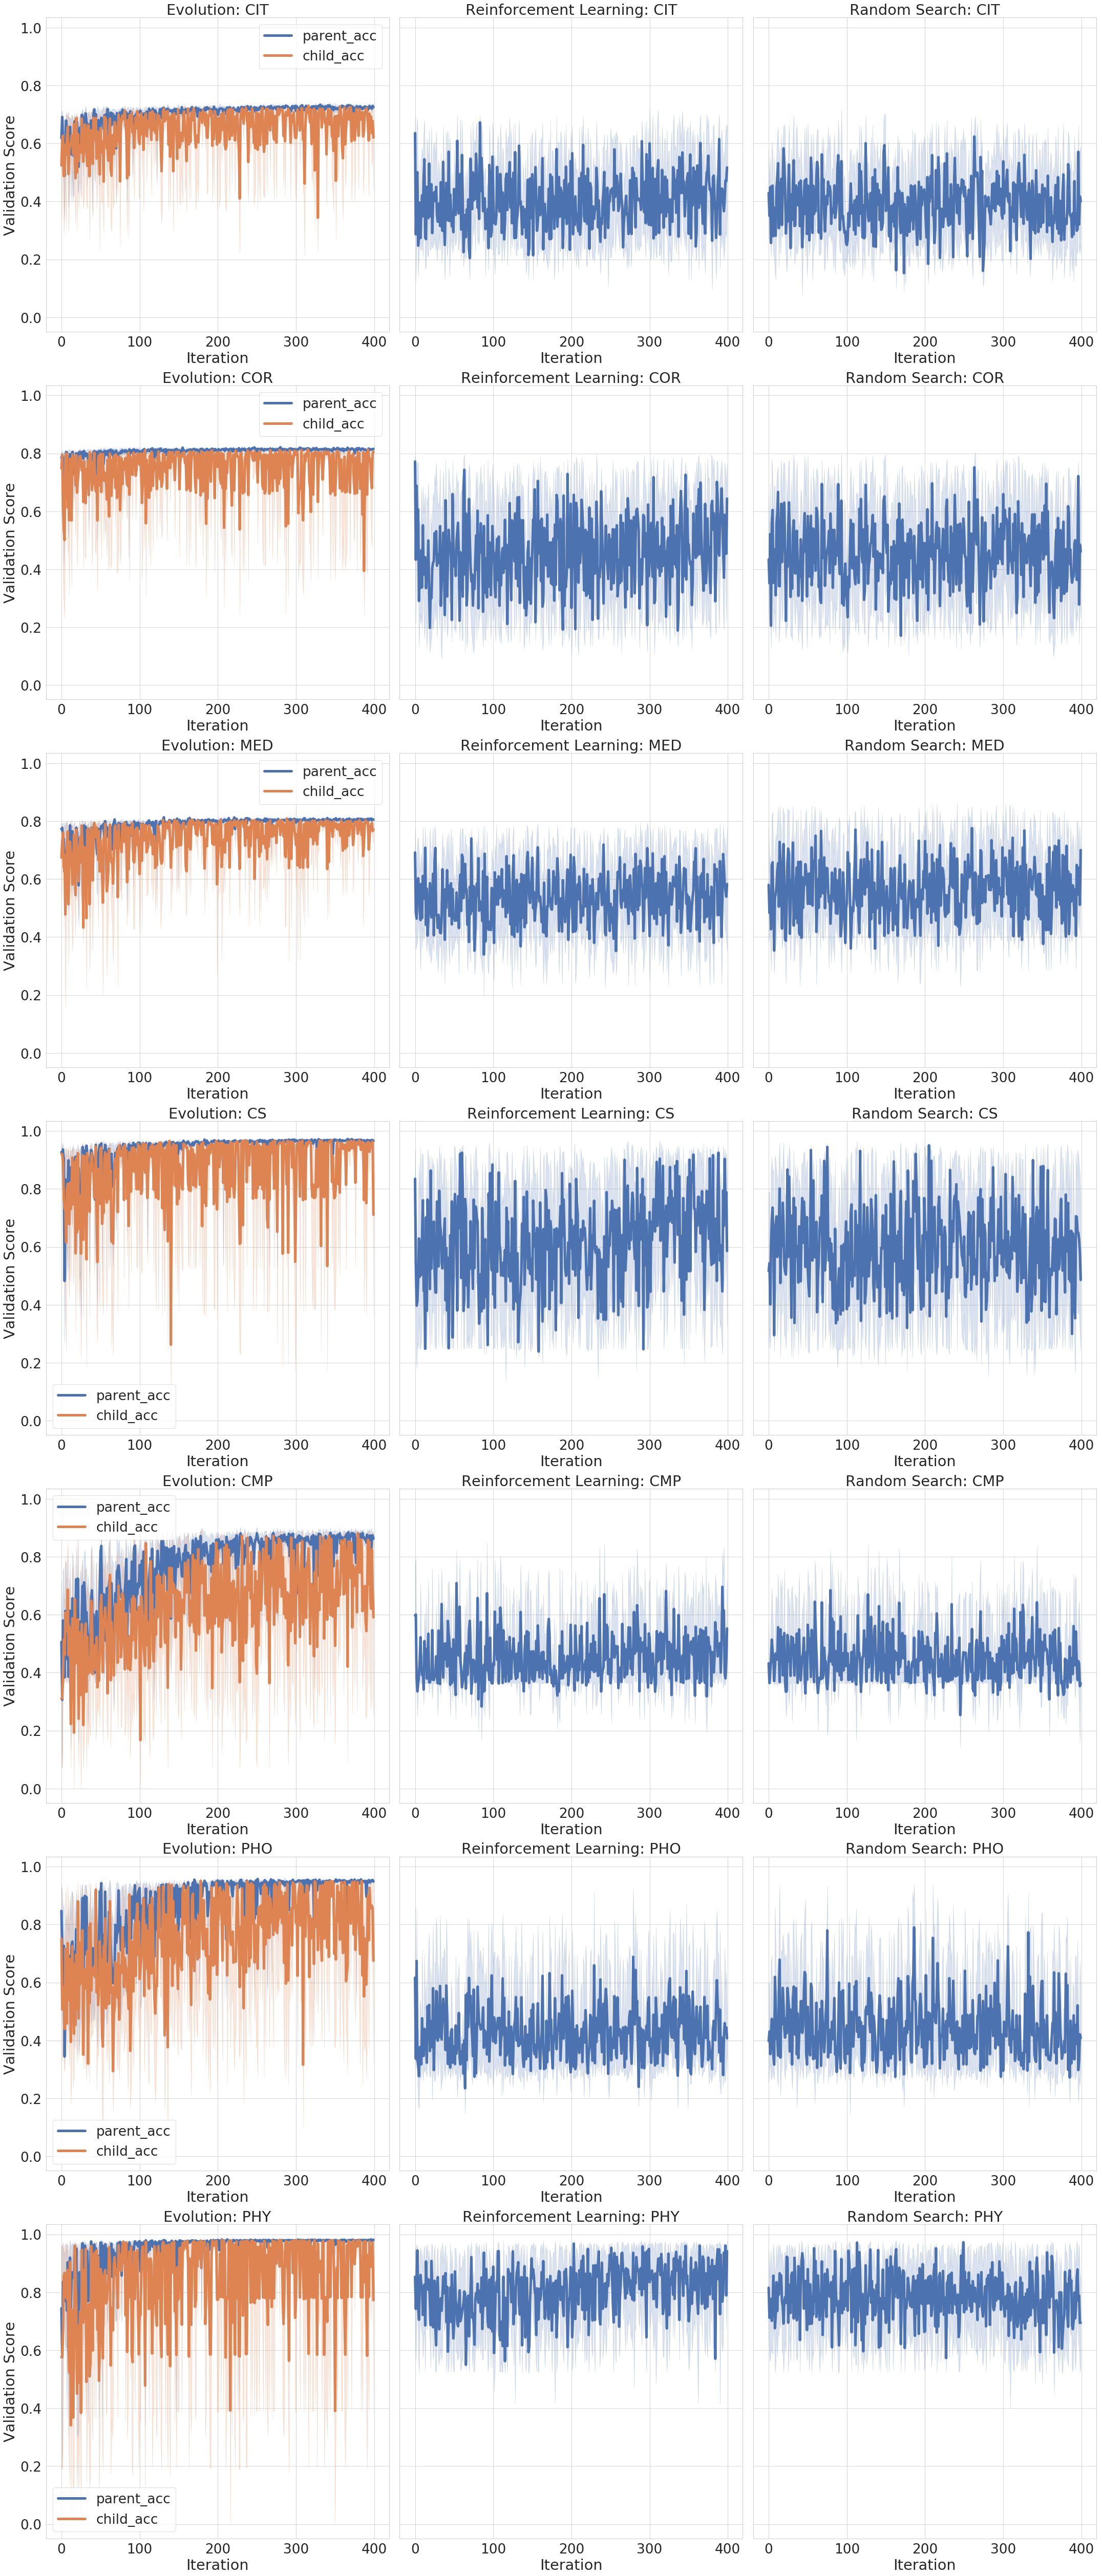

In [3]:
# MACRO
draw_lineplots(datasets, ev_results_all, rl_results_all, rs_results_all, macro=True)

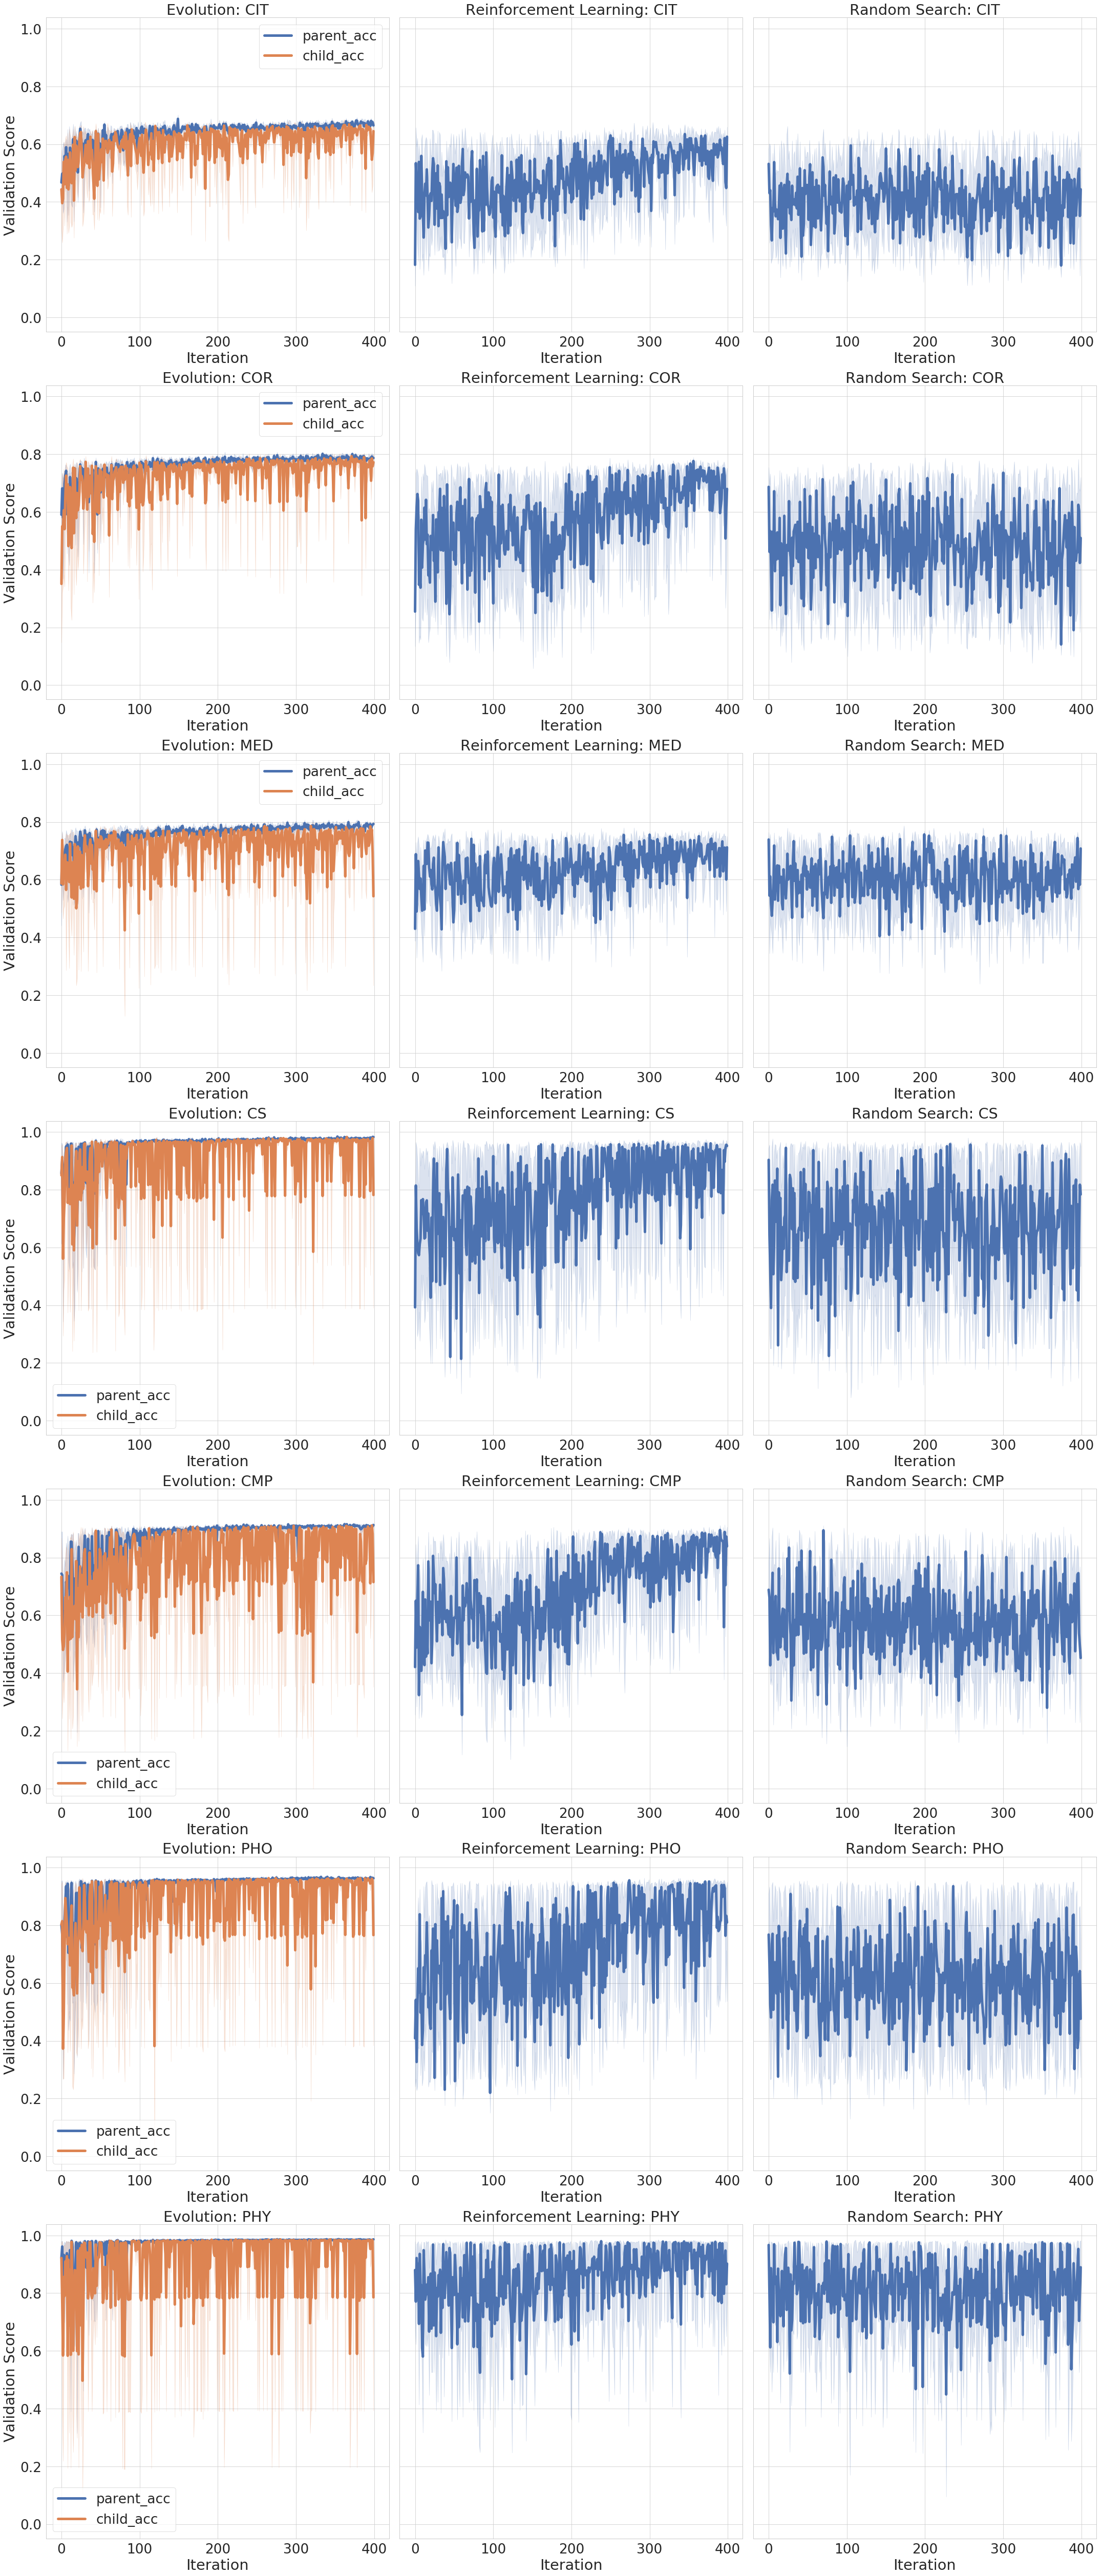

In [4]:
# MICRO
draw_lineplots(datasets, ev_results_all_micro, rl_results_all_micro, rs_results_all_micro, macro=False)

## Cumulative maximum accuracy value across iterations
The goal of the optimization process is to find the best performing architecture, these plots illustrate how was the evolution of the algorithm in achieving this goal

/home/math/jupyterenv/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


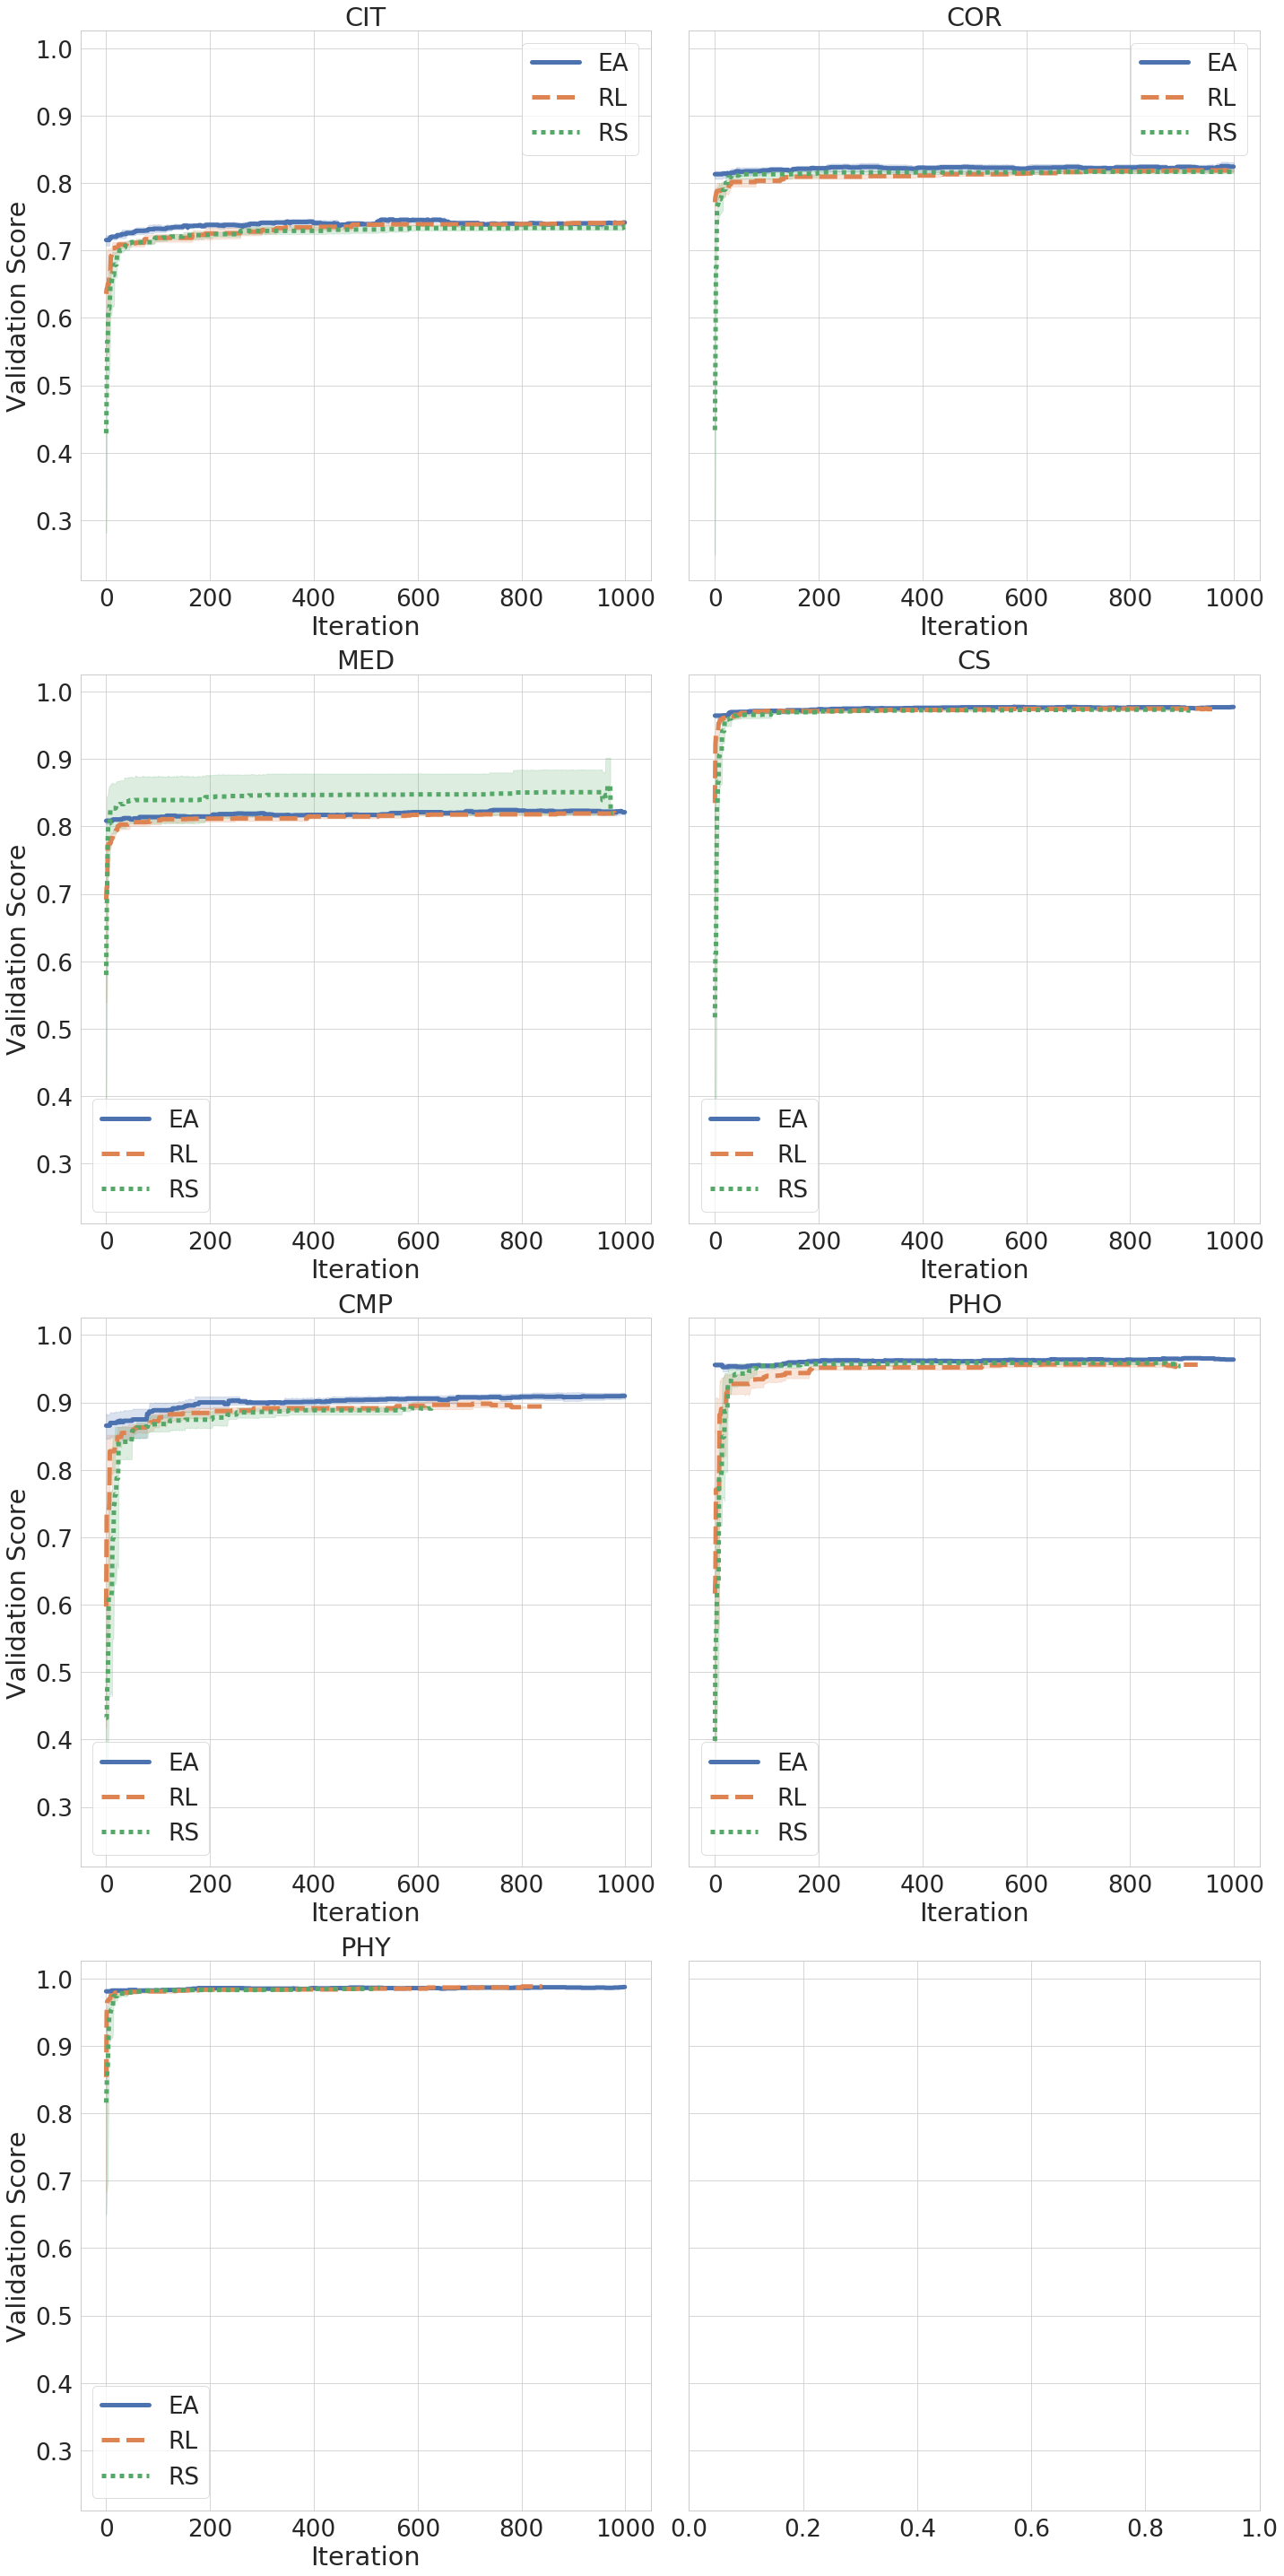

In [5]:
# MACRO
draw_cummmax(datasets, pop_stats_all, rl_results_all, rs_results_all, macro=True)

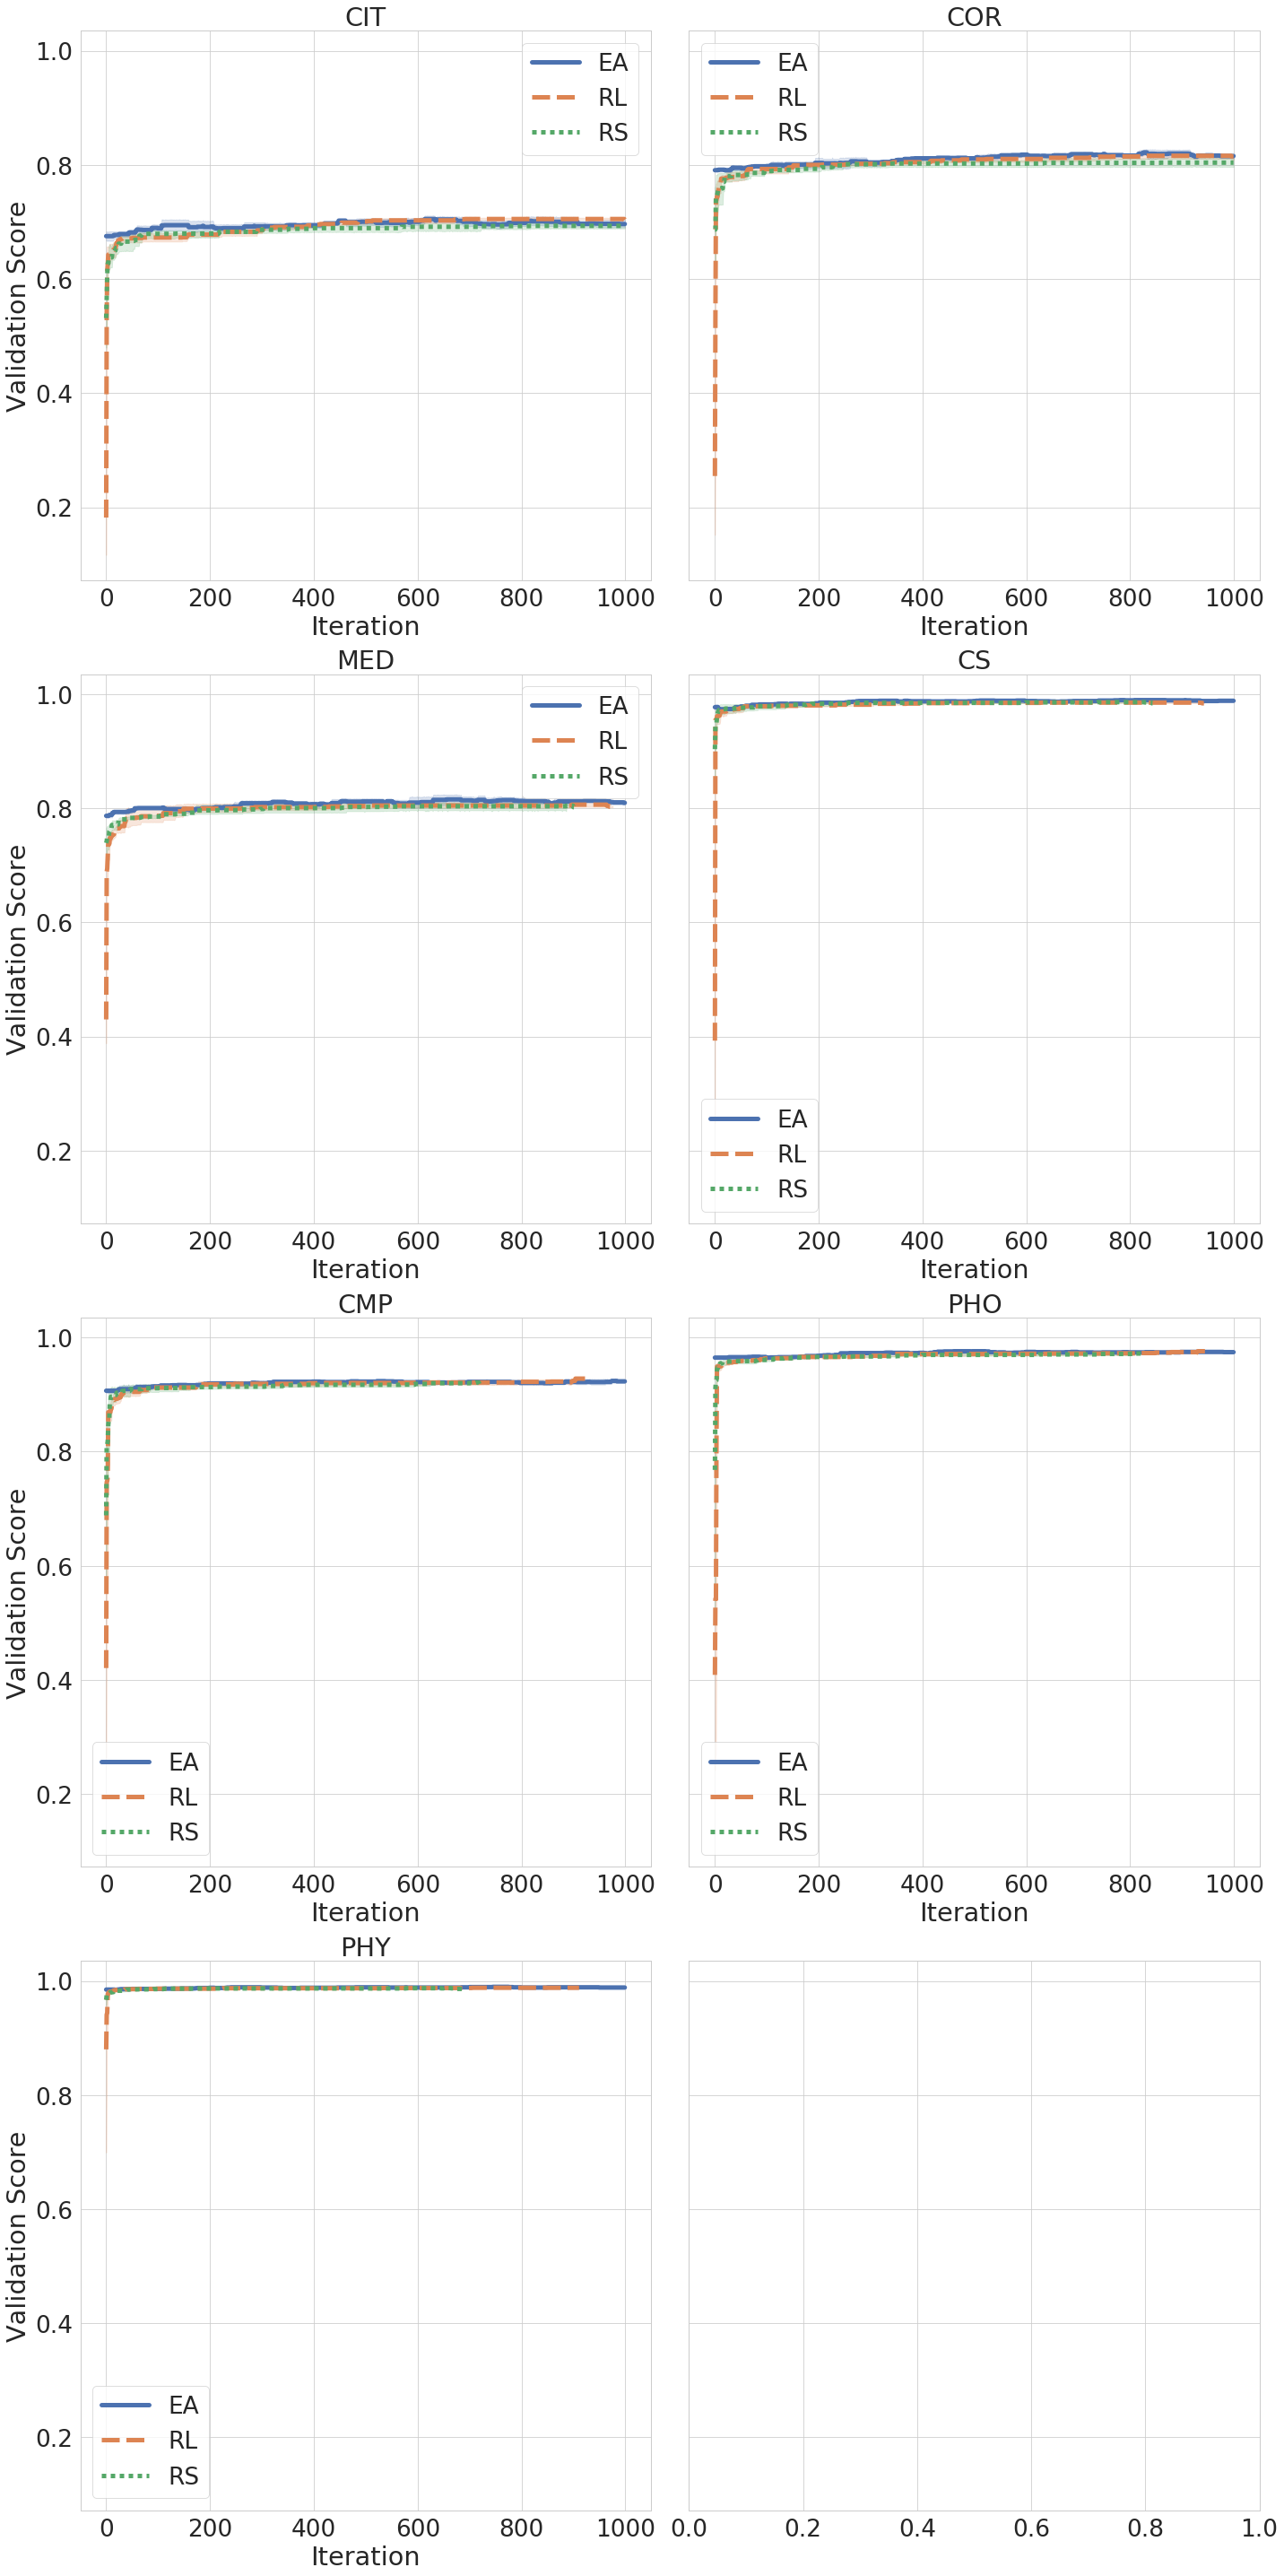

In [6]:
# MICRO
draw_cummmax(datasets, pop_stats_all_micro, rl_results_all_micro, rs_results_all_micro, macro=False)

## Cumulative number of architectures evaluated with accuracy higher than threshold
These plots present how many of the architectures evaluated over the optimization process are high quality. It illustrates the algorithm's ability to focus on good regions of the search space

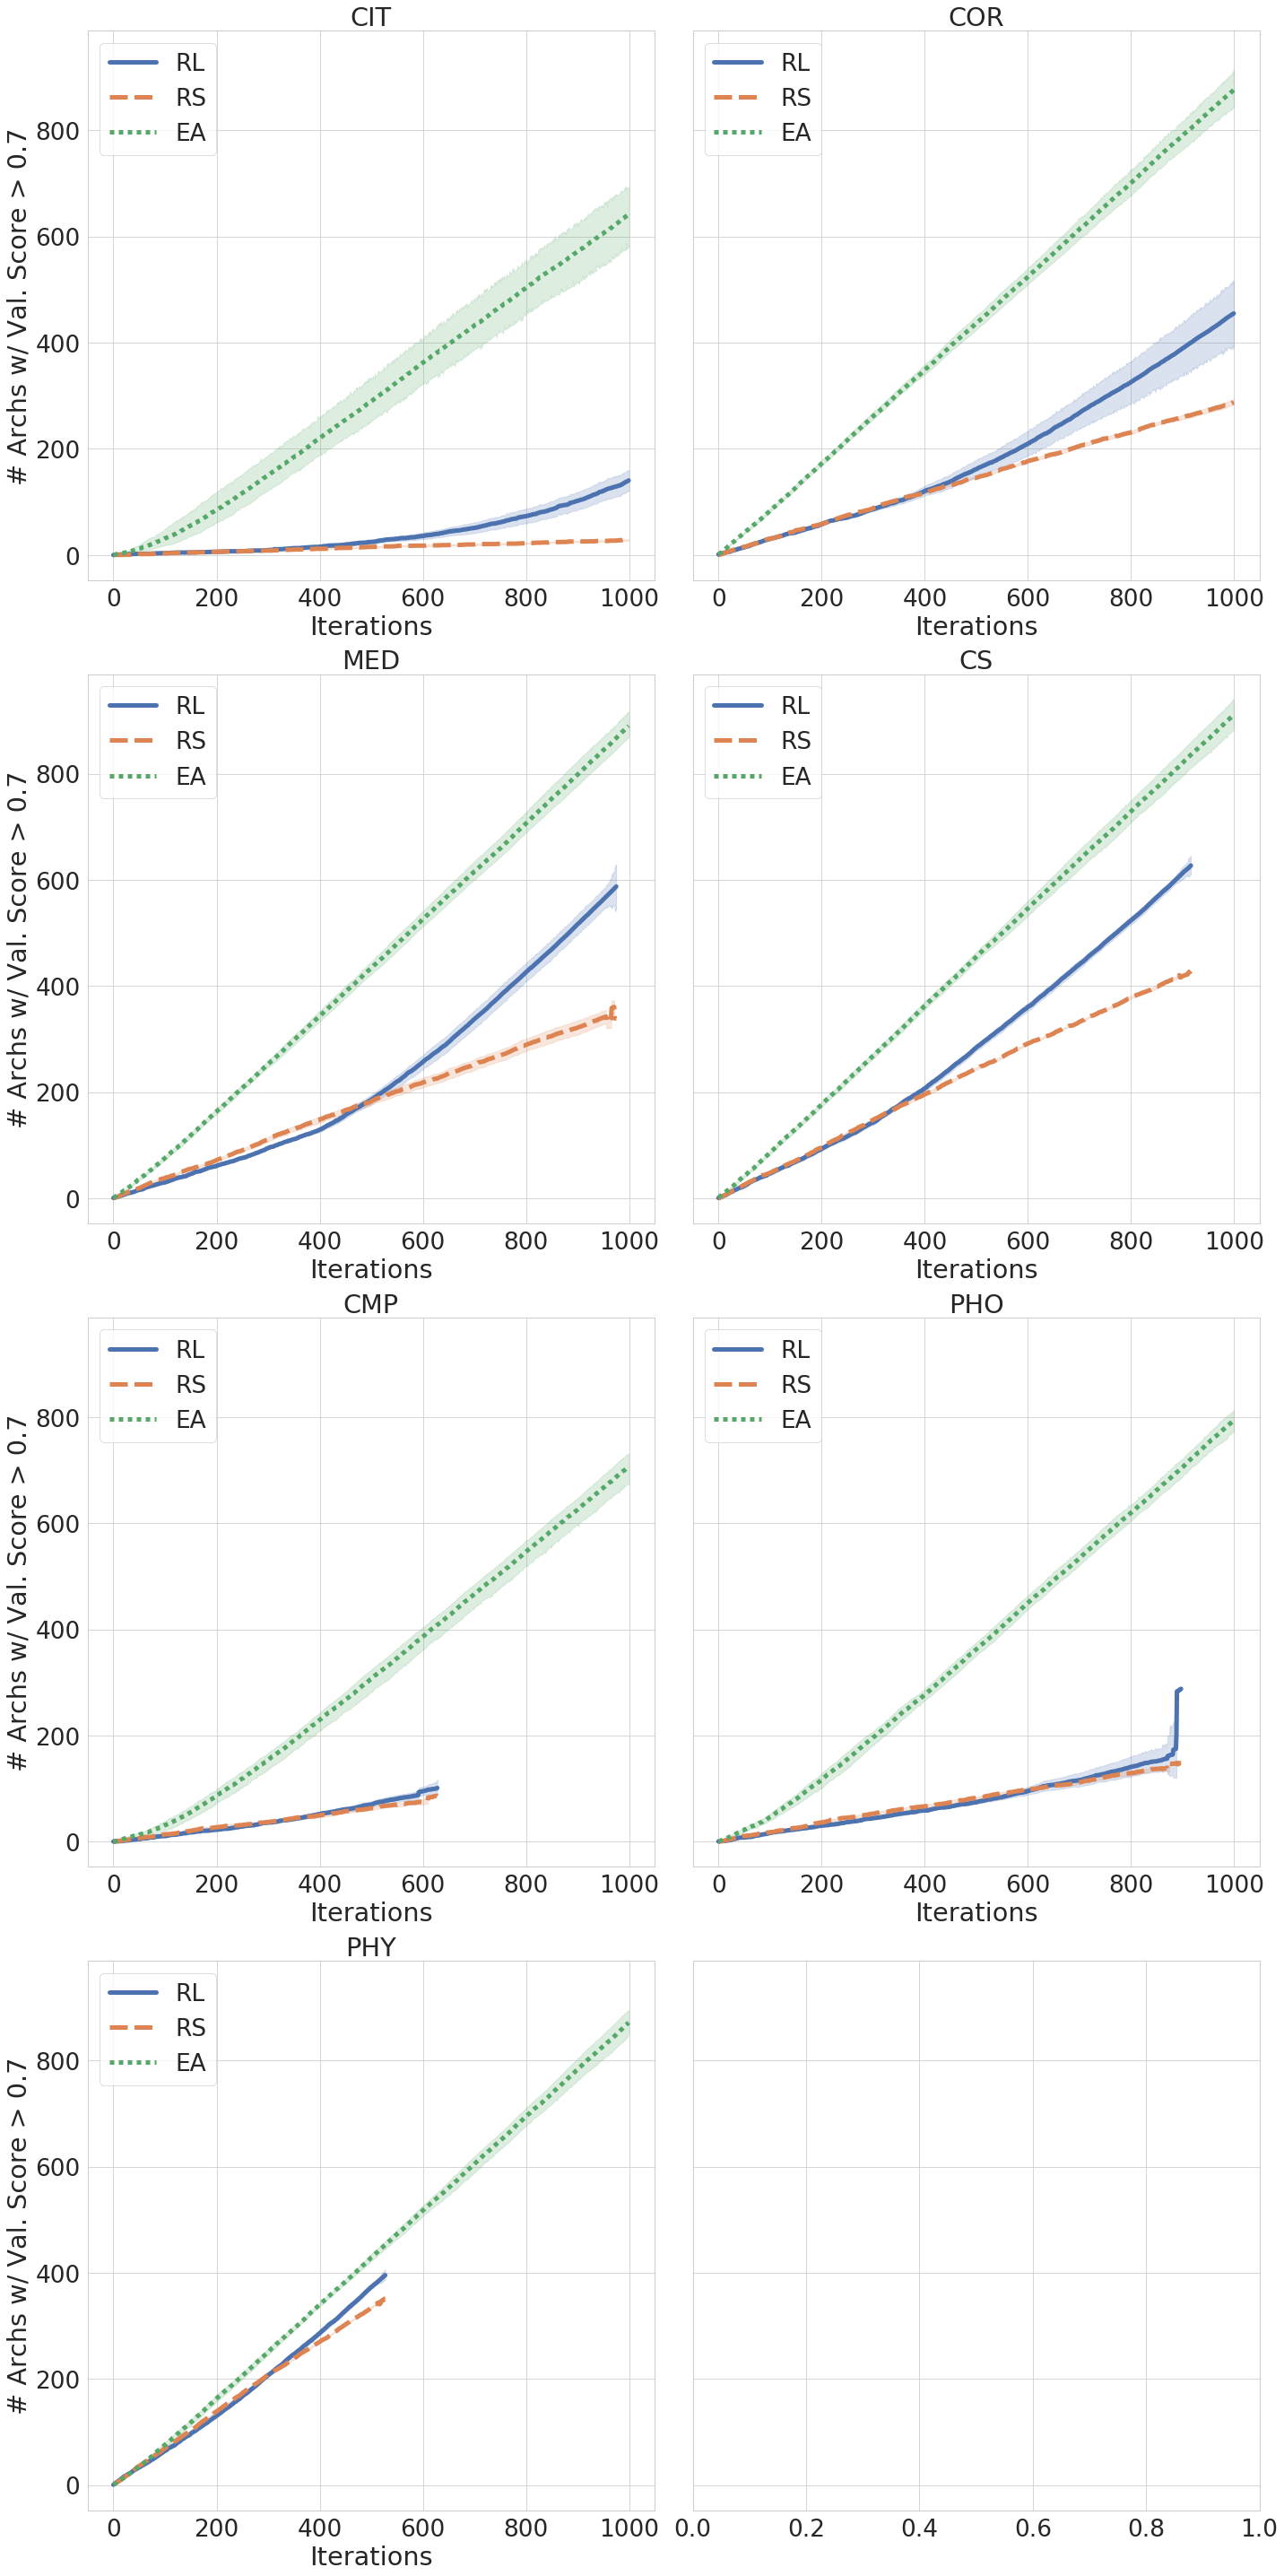

In [7]:
# MACRO
threshold = 0.7
draw_arch_count_over_threshold(datasets, rl_results_all, rs_results_all,
                               ev_results_all, threshold, macro=True)

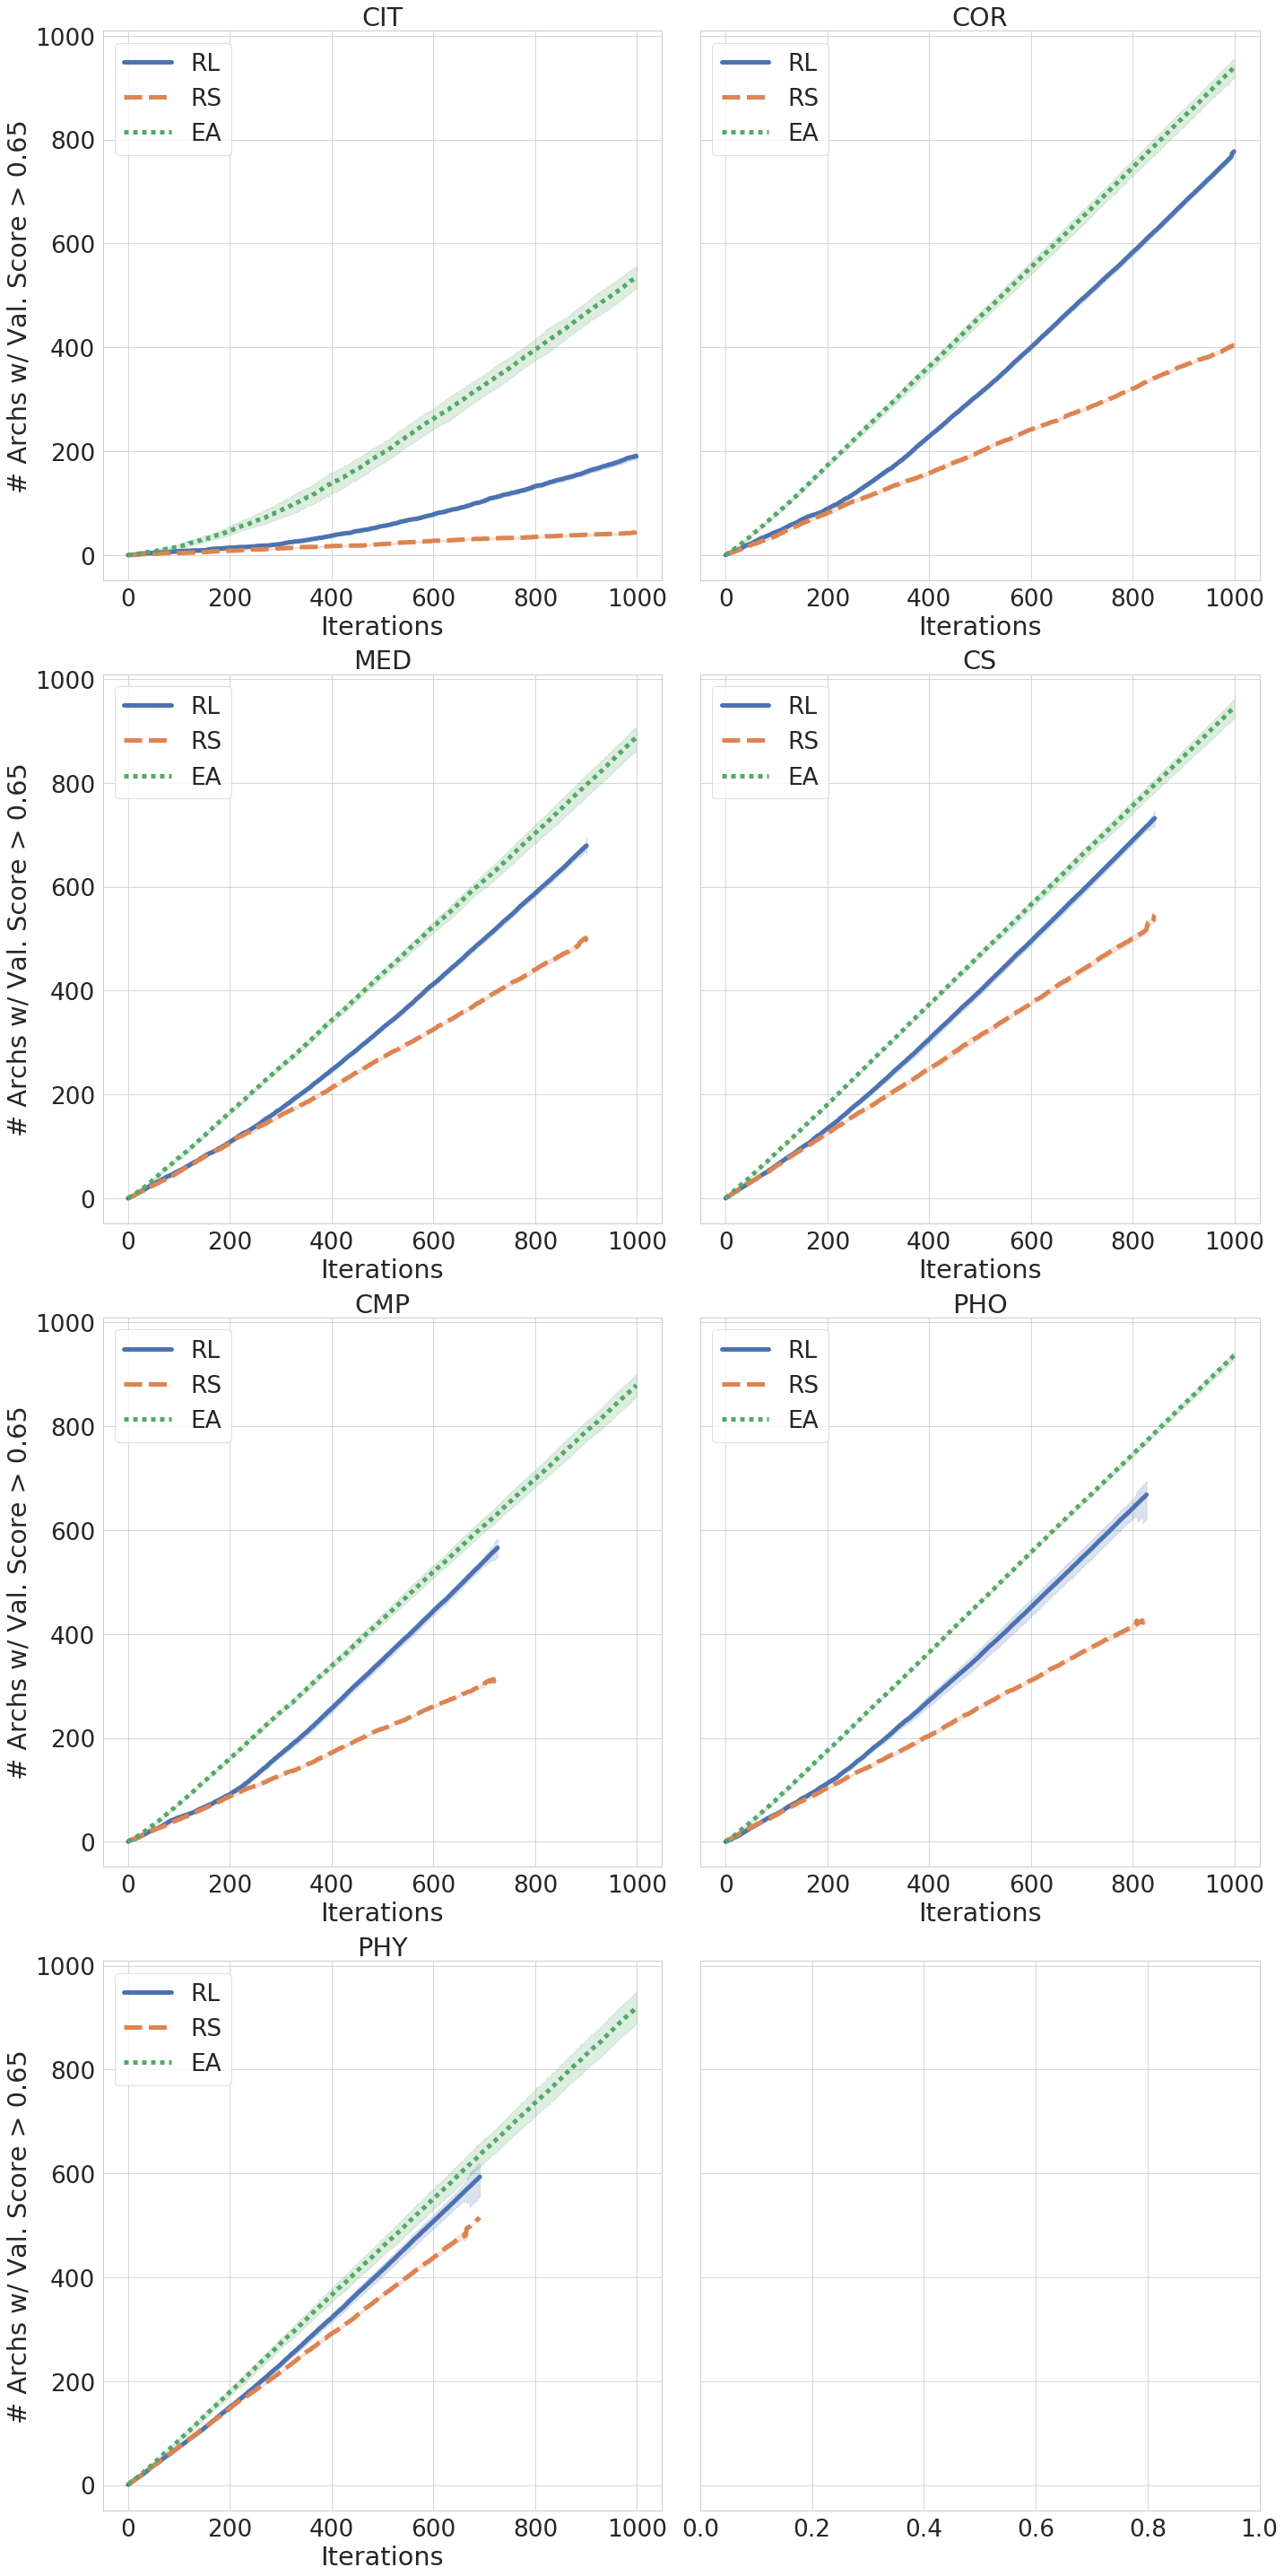

In [8]:
# MICRO
threshold = 0.65
draw_arch_count_over_threshold(datasets, rl_results_all_micro, rs_results_all_micro,
                               ev_results_all_micro, threshold, macro=False)

## Population statistics over the iterations
The following plots illustrate how the accuracy of the individuals in the population evolve with time.

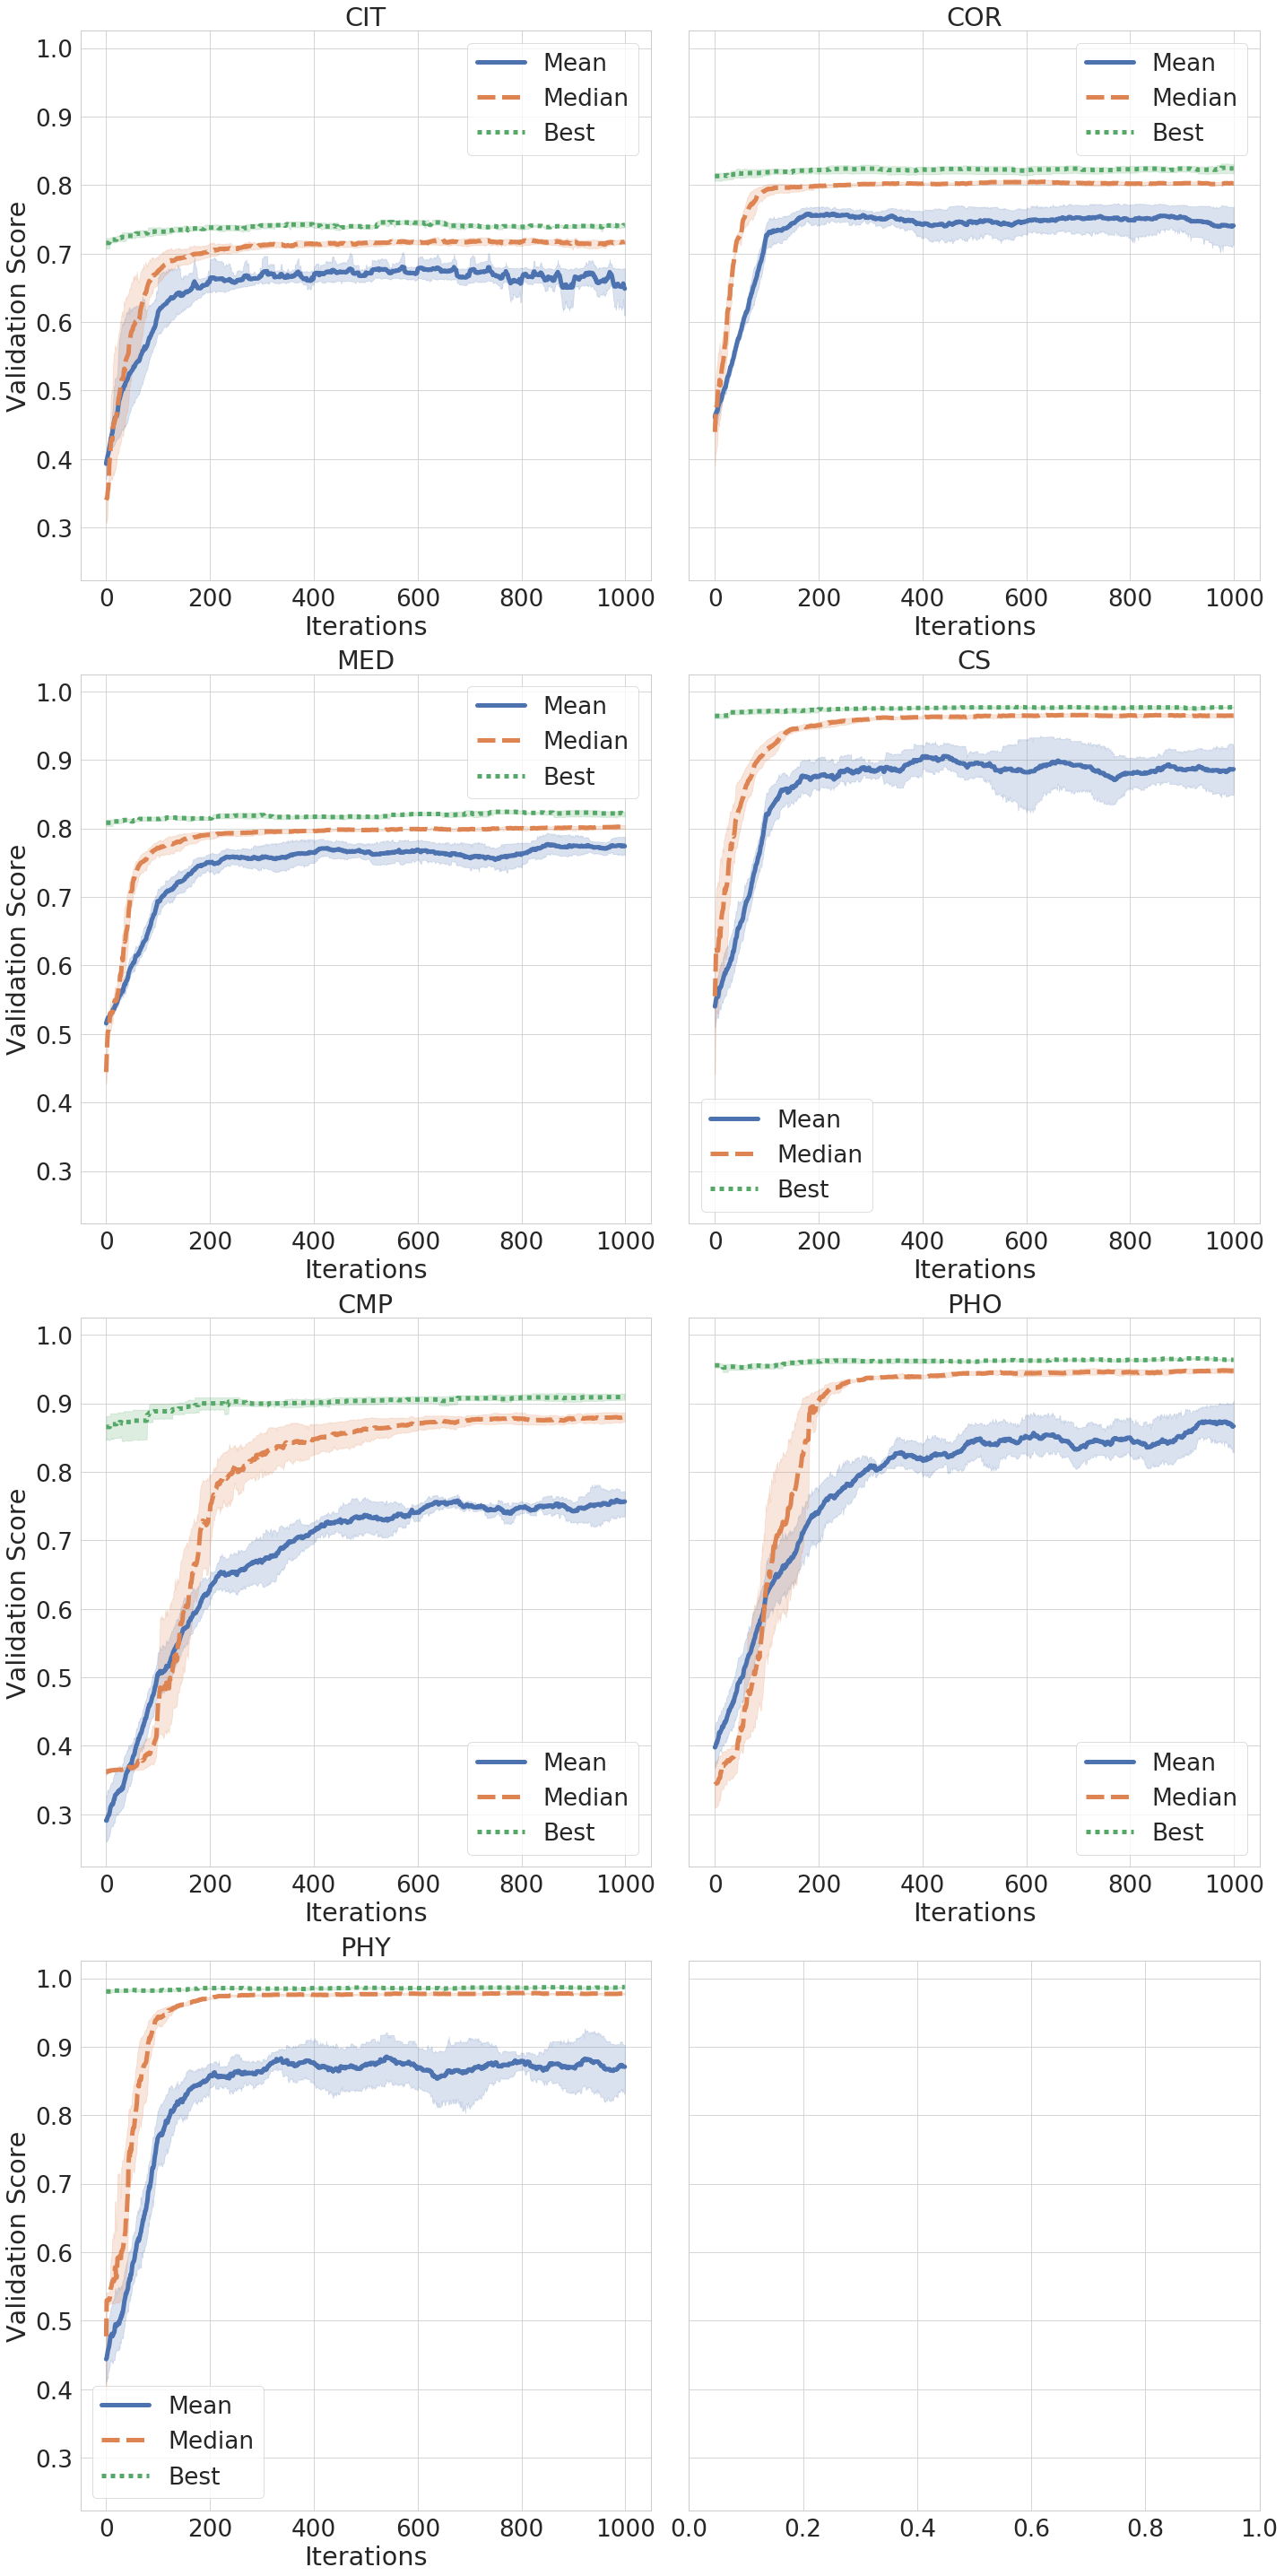

In [9]:
# MACRO
draw_population_stats_chart(pop_stats_all, datasets, macro=True)

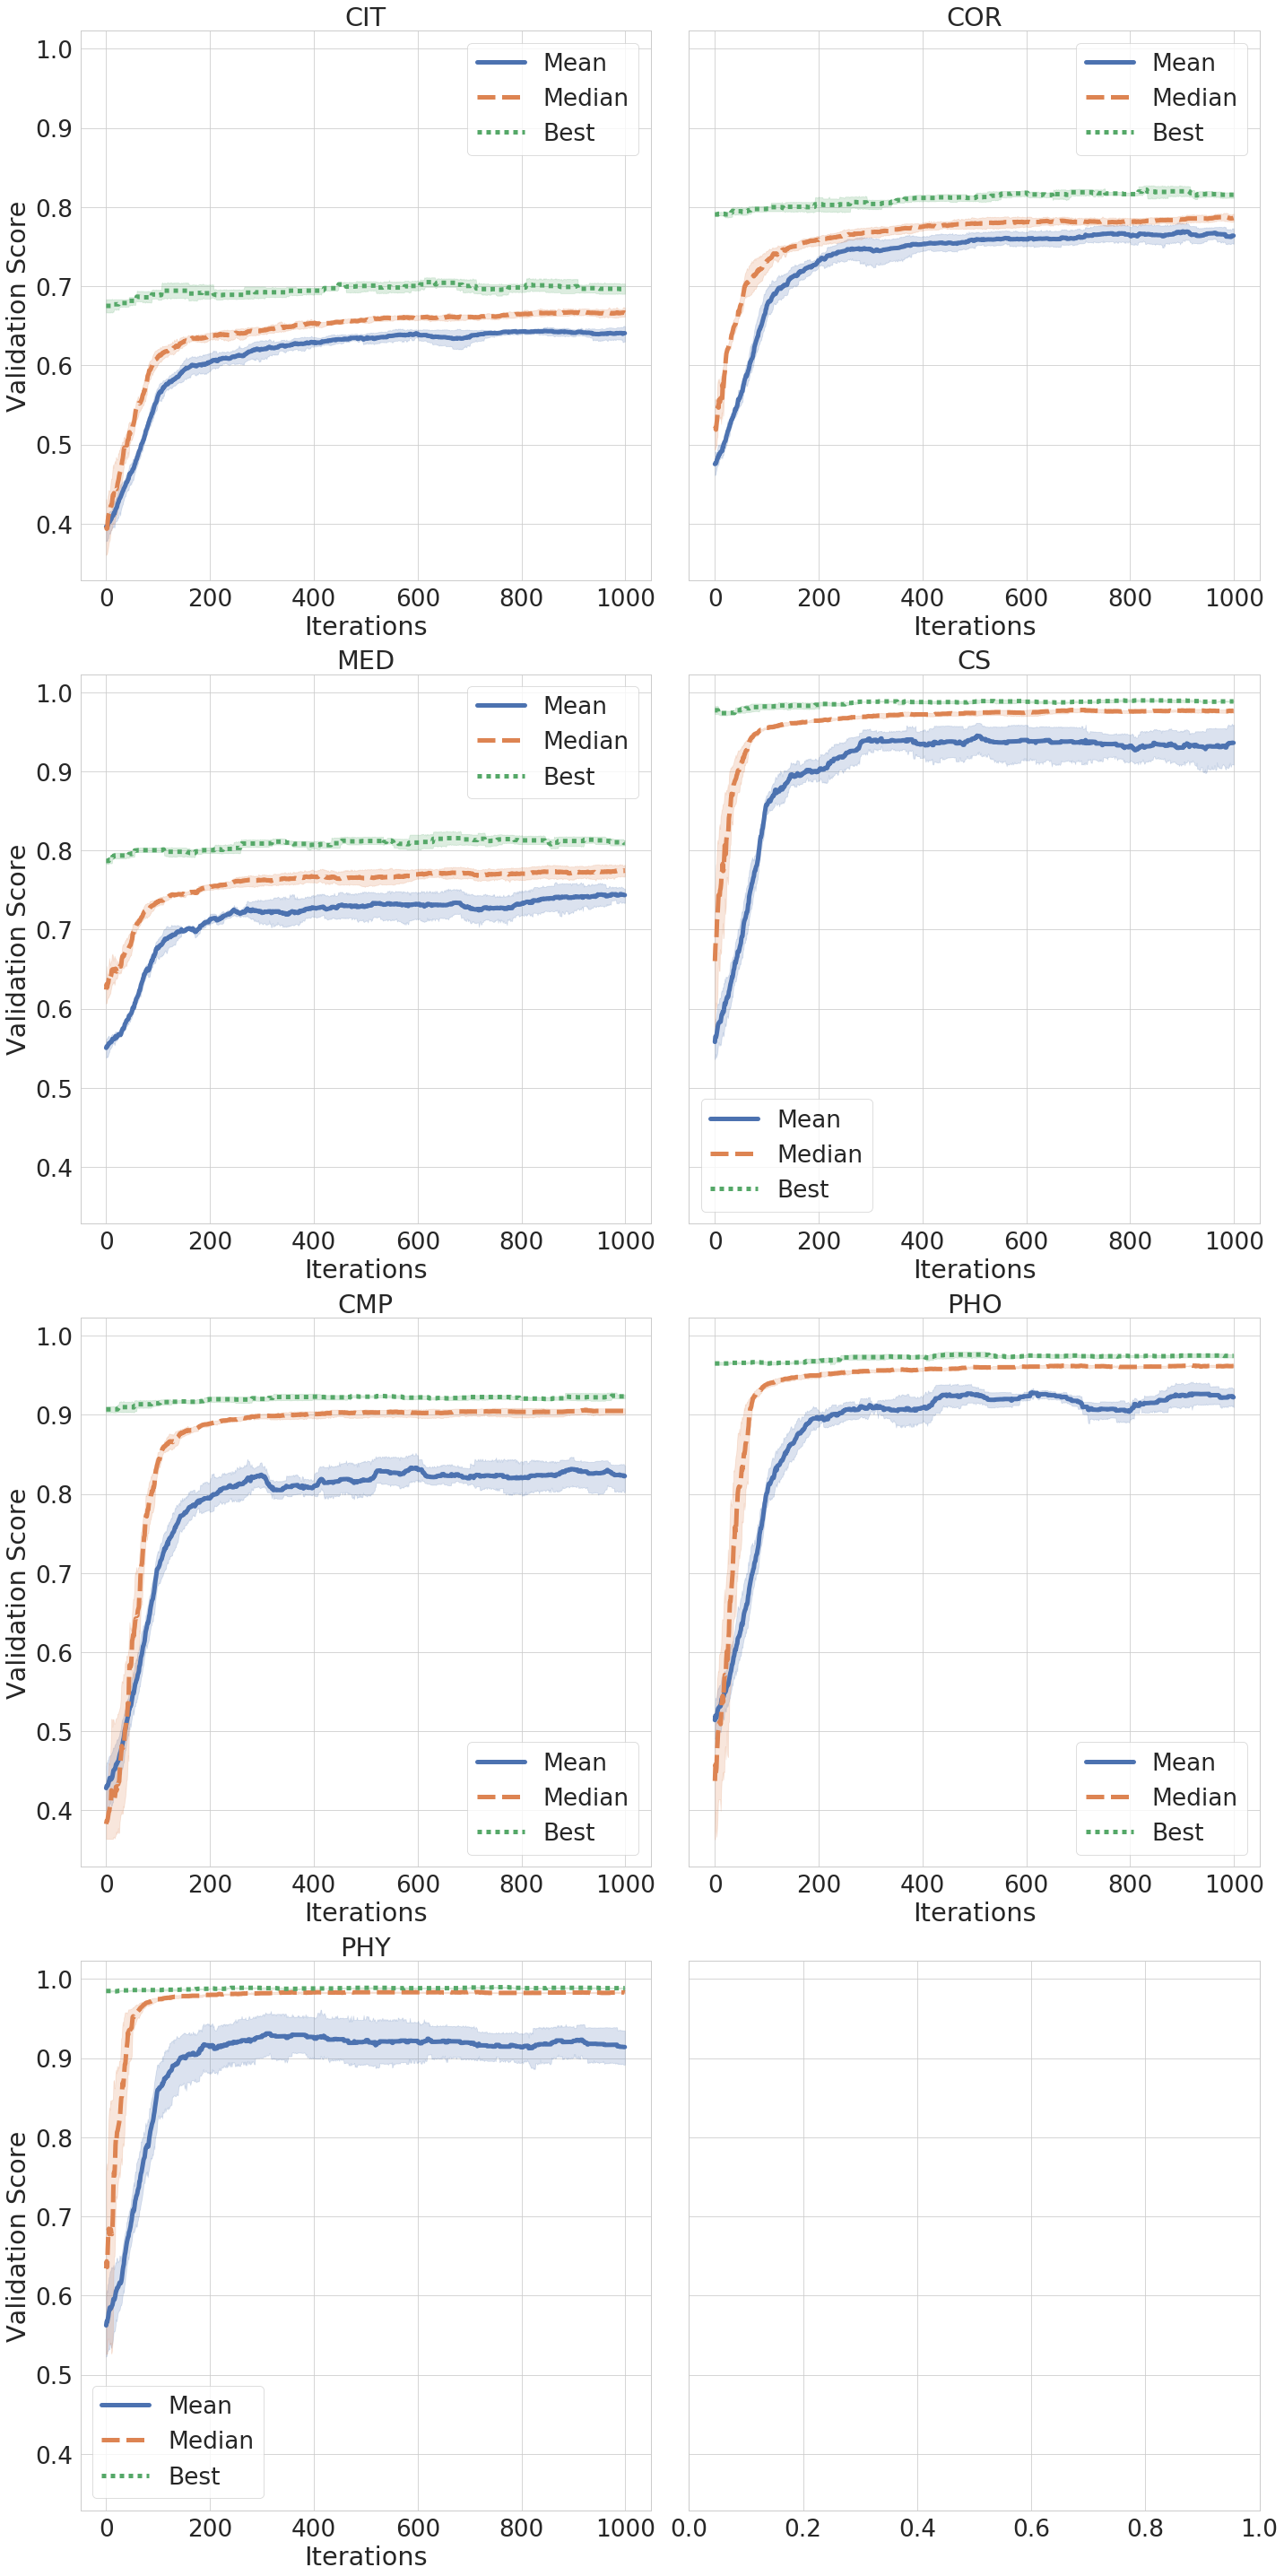

In [10]:
# MICRO
draw_population_stats_chart(pop_stats_all_micro, datasets, macro=False)

## Best accuracy boxplot for all datasets and methods

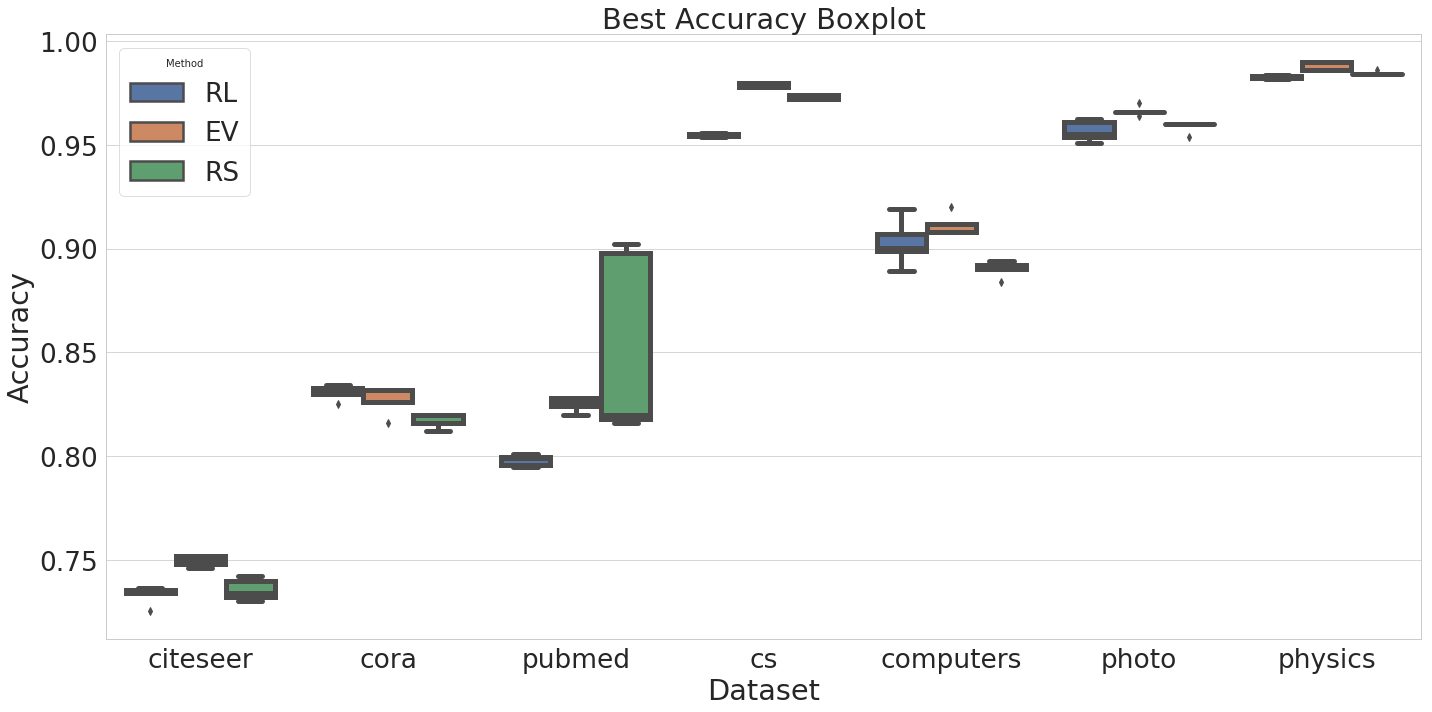

In [11]:
# MACRO
draw_best_acc_boxplot(rl_best_acc_all, rs_best_acc_all, pop_stats_all, datasets, macro=True)

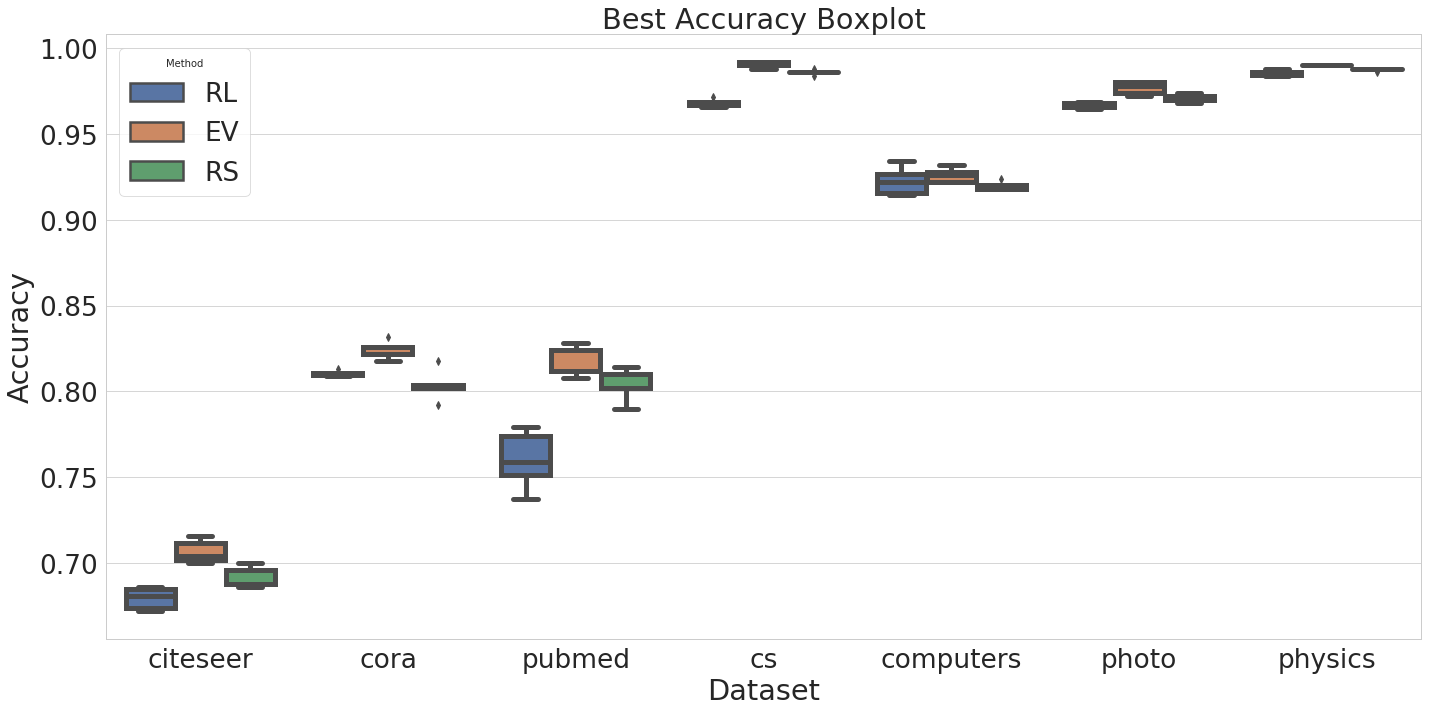

In [12]:
# MICRO
draw_best_acc_boxplot(rl_best_acc_all_micro, rs_best_acc_all_micro, pop_stats_all_micro, datasets, macro=False)

## Execution time for all datasets and methods

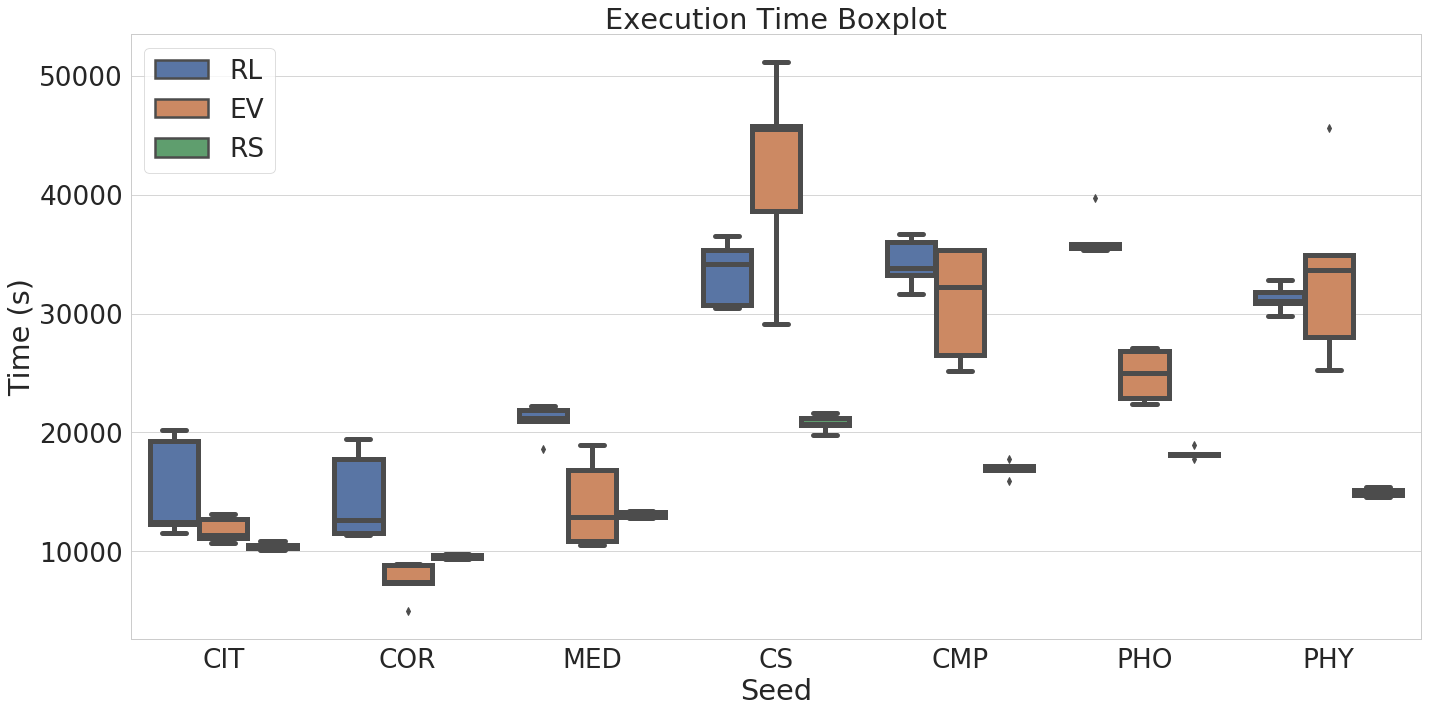

In [13]:
# MACRO
draw_boxplot_time(rl_times_all, ev_times_all, rs_times_all, datasets, macro=True)

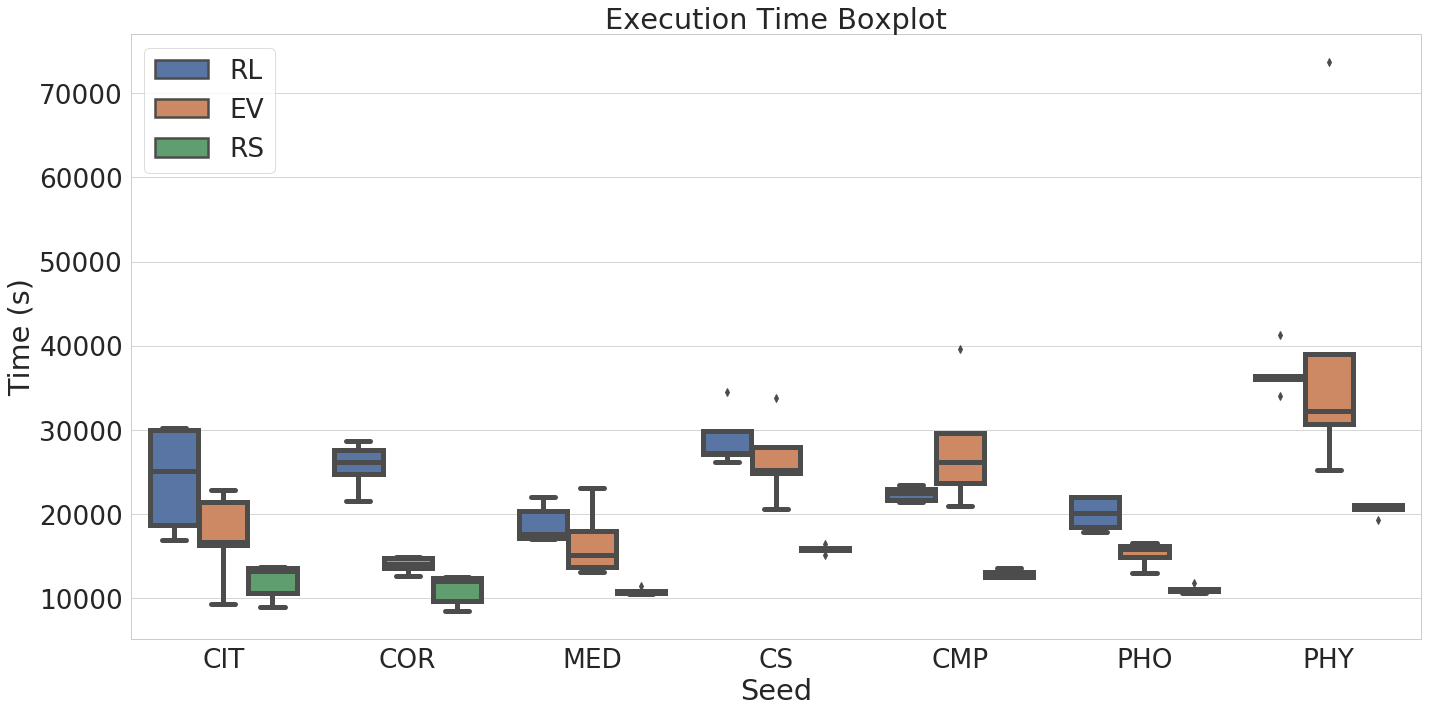

In [14]:
# MICRO
draw_boxplot_time(rl_times_all_micro, ev_times_all_micro, rs_times_all_micro, datasets, macro=False)

## Percentage of Architectures that OOM'd the GPU
The plot and table below present the amount of architectures that did not fit into GPU memory and therefore were not evaluated  

In [15]:
full_oom = get_oom_dataframe(datasets, rl_oom_all, rs_oom_all, ev_oom_all)
full_oom.groupby(['dataset', 'variable']).describe()['value'][['mean', 'std', 'max']].to_latex(float_format="%.2f")

'\\begin{tabular}{llrrr}\n\\toprule\n    &    &  mean &  std &  max \\\\\ndataset & variable &       &      &      \\\\\n\\midrule\nCIT & EA &  0.00 & 0.00 & 0.00 \\\\\n    & RL &  0.00 & 0.00 & 0.00 \\\\\n    & RS &  0.00 & 0.00 & 0.00 \\\\\nCMP & EA &  0.12 & 0.02 & 0.14 \\\\\n    & RL &  0.47 & 0.21 & 0.81 \\\\\n    & RS &  0.39 & 0.02 & 0.41 \\\\\nCOR & EA &  0.00 & 0.00 & 0.00 \\\\\n    & RL &  0.00 & 0.00 & 0.00 \\\\\n    & RS &  0.00 & 0.00 & 0.00 \\\\\nCS & EA &  0.05 & 0.01 & 0.06 \\\\\n    & RL &  0.11 & 0.02 & 0.14 \\\\\n    & RS &  0.10 & 0.01 & 0.11 \\\\\nMED & EA &  0.01 & 0.01 & 0.03 \\\\\n    & RL &  0.04 & 0.01 & 0.04 \\\\\n    & RS &  0.03 & 0.01 & 0.04 \\\\\nPHO & EA &  0.05 & 0.03 & 0.09 \\\\\n    & RL &  0.21 & 0.03 & 0.24 \\\\\n    & RS &  0.12 & 0.02 & 0.14 \\\\\nPHY & EA &  0.14 & 0.02 & 0.16 \\\\\n    & RL &  0.42 & 0.09 & 0.56 \\\\\n    & RS &  0.48 & 0.01 & 0.49 \\\\\n\\bottomrule\n\\end{tabular}\n'

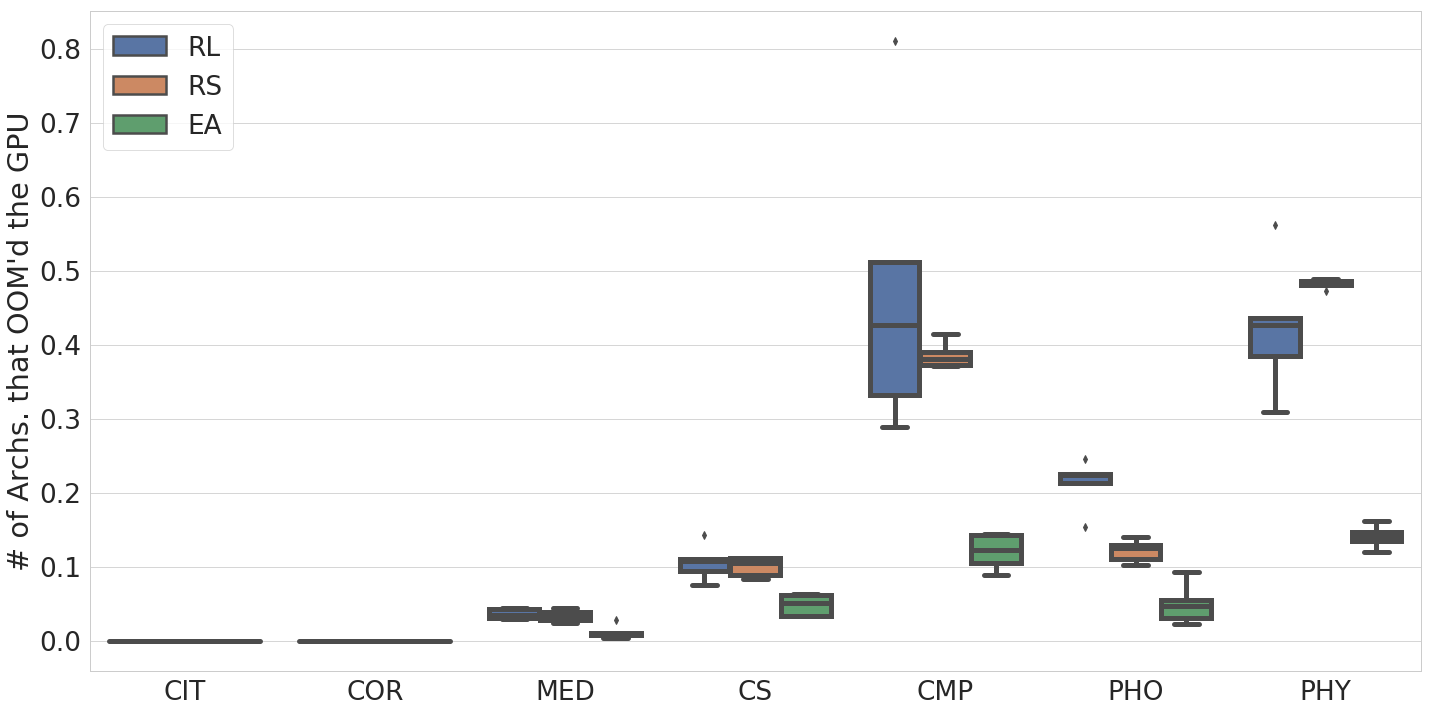

In [16]:
draw_oom_boxplot(datasets, rl_oom_all, rs_oom_all, ev_oom_all, macro=True)

## Boxplot of EA initial population accuracy

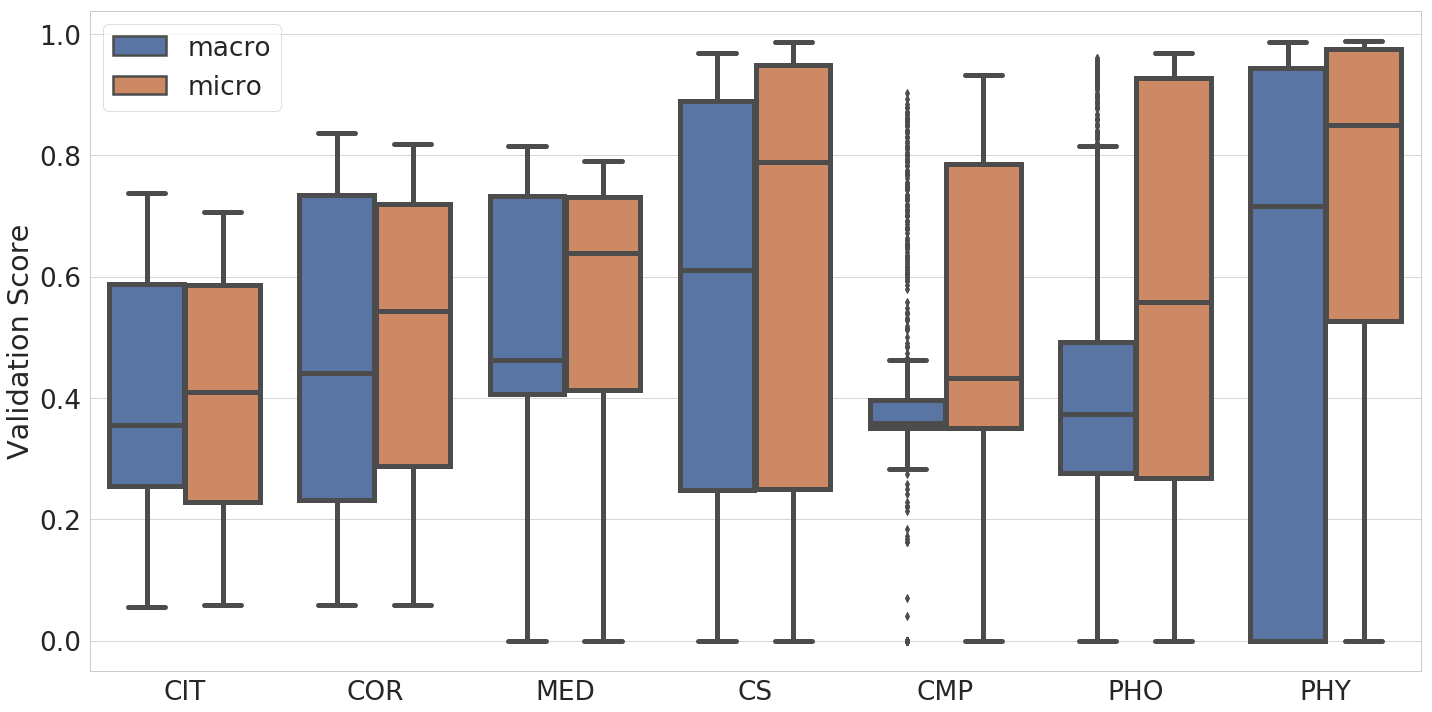

In [17]:
draw_initial_pop_boxplot(datasets, initial_pop_all, initial_pop_all_micro)

## Parameter size analysis

In [18]:
from graphnas.search_space import MacroSearchSpace
search_space_cls = MacroSearchSpace()
search_space = search_space_cls.get_search_space()
action_list = search_space_cls.generate_action_list(2)
action_list

['attention_type',
 'aggregator_type',
 'activate_function',
 'number_of_heads',
 'hidden_units',
 'attention_type',
 'aggregator_type',
 'activate_function',
 'number_of_heads',
 'hidden_units']

In [19]:
def _construct_action(actions, action_list, search_space):
    structure_list = []
    for single_action in actions:
        structure = []
        for action, action_name in zip(single_action, action_list):
            predicted_actions = search_space[action_name][action]
            structure.append(predicted_actions)
        structure_list.append(structure)
    return structure_list

In [20]:
for ds in datasets:
    ev_arch_all[ds]['value'] = ev_arch_all[ds]['value'].apply(lambda x: _construct_action([
    [int(elem) for elem in x[1:-1].split(',')]], action_list, search_space))

In [21]:
ev_arch_all['citeseer']['value'].values

array([list([['linear', 'sum', 'elu', 6, 256, 'cos', 'sum', 'elu', 1, 32]]),
       list([['generalized_linear', 'sum', 'leaky_relu', 4, 64, 'generalized_linear', 'sum', 'softplus', 8, 8]]),
       list([['gat_sym', 'mlp', 'elu', 8, 64, 'linear', 'max', 'softplus', 16, 8]]),
       ...,
       list([['generalized_linear', 'sum', 'elu', 2, 128, 'gcn', 'sum', 'elu', 6, 32]]),
       list([['gcn', 'sum', 'linear', 2, 128, 'gcn', 'sum', 'elu', 16, 256]]),
       list([['gcn', 'sum', 'leaky_relu', 2, 128, 'gcn', 'sum', 'elu', 2, 4]])],
      dtype=object)

In [22]:
rl_best_acc_all['computers'][rl_best_acc_all['computers']['accuracy'] == 
                            rl_best_acc_all['computers']['accuracy'].max()]['arch'].values

array([" ['const', 'max', 'linear', 8, 64, 'cos', 'sum', 'linear', 2, 10]"],
      dtype=object)

In [23]:
rs_best_acc_all['computers'][rs_best_acc_all['computers']['accuracy'] == 
                            rs_best_acc_all['computers']['accuracy'].max()]['arch'].values

array(["['const', 'mlp', 'relu6', 8, 32, 'gat_sym', 'sum', 'linear', 2, 4]"],
      dtype=object)

In [24]:
rl_best_acc_all['cora']

accuracy     error seed dataset  \
0   0.82526  0.003802   42    cora   
1   0.83426  0.003419   10    cora   
2   0.83280  0.003771   79    cora   
3   0.83231  0.005870  123    cora   
4   0.83007  0.004167   19    cora   

                                                arch  
0   ['const', 'sum', 'softplus', 6, 256, 'general...  
1   ['const', 'sum', 'elu', 4, 32, 'linear', 'sum...  
2   ['const', 'sum', 'leaky_relu', 6, 128, 'gener...  
3   ['const', 'sum', 'linear', 2, 256, 'generaliz...  
4   ['generalized_linear', 'sum', 'linear', 8, 64...